# **1. Setup and Imports**

In [ ]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# **2. Load the Graph of Vsevolozhsky District**

In [ ]:
# Place
place = "Vsevolozhsky District, Leningrad Oblast, Russia"

# Download the street network
print(f"Loading graph for: {place}...")
G = ox.graph_from_place(place, network_type="drive")

# Graph info
print("Graph loaded successfully:")
print(G)

Loading graph for: Vsevolozhsky District, Leningrad Oblast, Russia...
Graph loaded successfully:
MultiDiGraph with 19740 nodes and 49485 edges



Plotting the graph


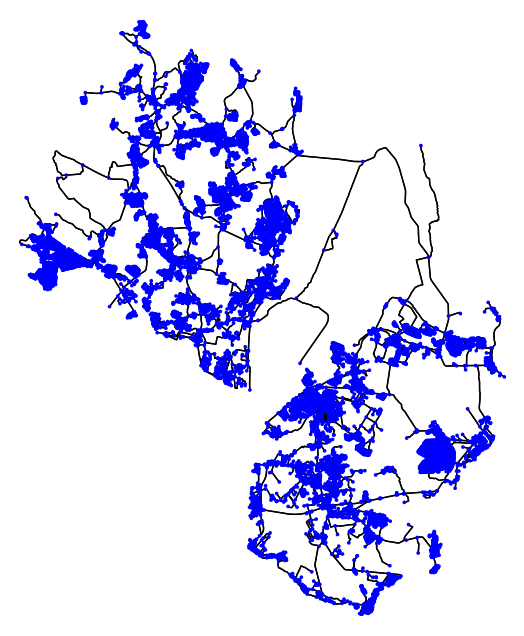

Map plotted.


In [ ]:
# Plot the graph
print("\nPlotting the graph")
fig, ax = ox.plot_graph(G, node_size=7, node_color='blue', edge_color='black', bgcolor='white')
print("Map plotted.")
plt.show()

In [ ]:
# Get the degree for each node
degrees = [d for n, d in G.degree()]

# Print some simple statistics
print(f"\nTotal nodes (intersections): {len(degrees)}")
print(f"Average node degree: {sum(degrees) / len(degrees):.2f}")


Total nodes (intersections): 19740
Average node degree: 5.01


In [ ]:
# Count how many nodes have each specific degree (e.g., 500 nodes have degree 3)
cnt = Counter(degrees)

# Convert the counter to a pandas DataFrame
deg_df = pd.DataFrame(cnt.items(), columns=["degree", "count"]).sort_values(by="degree")

# Calculate the distribution (probability) for each degree
deg_df["dist"] = deg_df["count"] / G.number_of_nodes()

# Display the resulting table
print("\nDegree Distribution Table:")
print(deg_df)


Degree Distribution Table:
   degree  count      dist
8       1      8  0.000405
4       2   5379  0.272492
5       3    469  0.023759
3       4    332  0.016819
2       5    120  0.006079
0       6  11302  0.572543
9       7      3  0.000152
1       8   2116  0.107194
6       9      2  0.000101
7      10      9  0.000456



Plotting 1: Bar Chart...


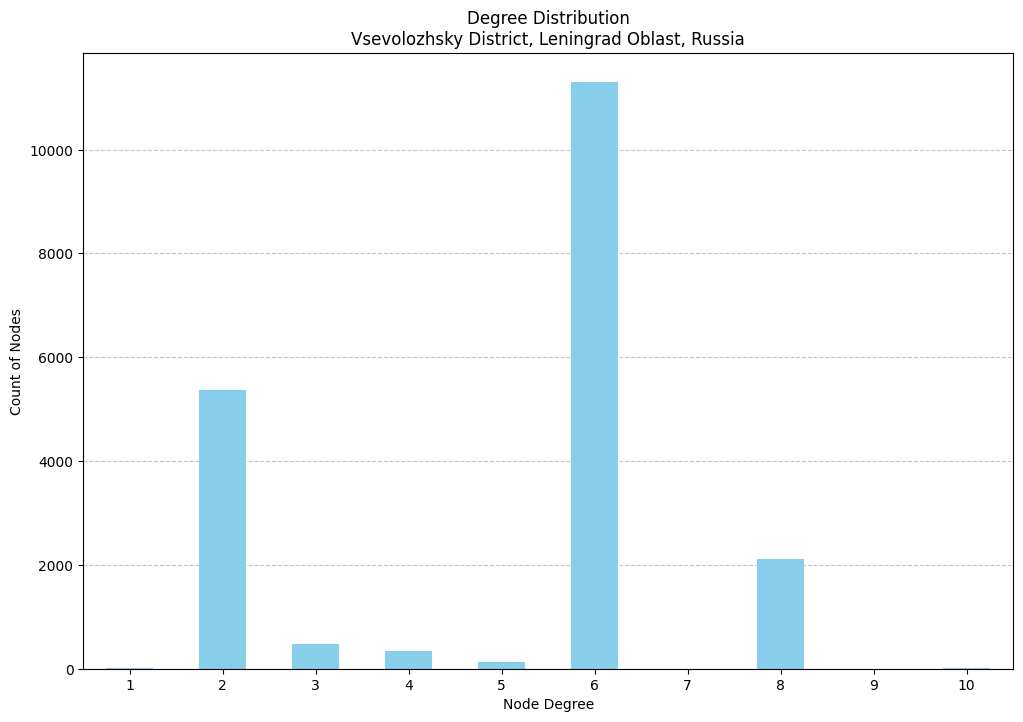

In [ ]:
# Plot a bar chart of the degree counts
print("\nPlotting 1: Bar Chart...")
ax1 = deg_df.plot(
    x="degree",
    y="count",
    kind="bar",
    figsize=(12, 8),
    title=f"Degree Distribution\n{place}",
    xlabel="Node Degree",
    ylabel="Count of Nodes",
    legend=False,
    color="skyblue",
    zorder=2
)

ax1.grid(axis="y", linestyle="--", alpha=0.7)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0) # Keep x-axis labels horizontal
plt.show()


Plotting 2: Log-Log Scale


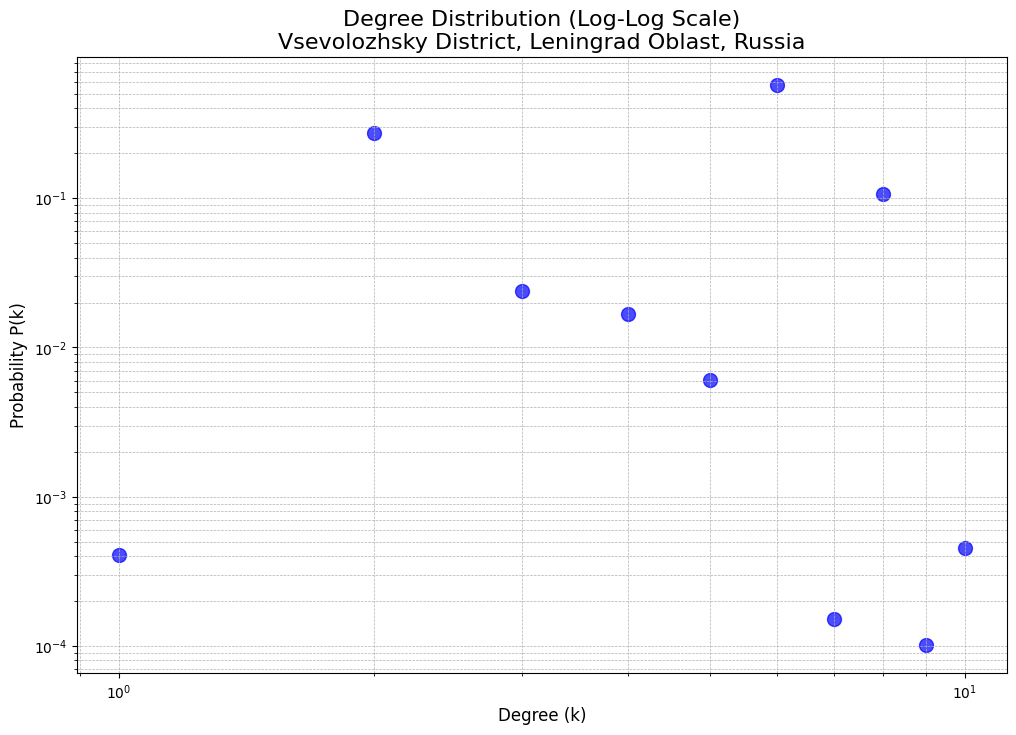

In [ ]:
# Plot the distribution on a log-log scale
print("\nPlotting 2: Log-Log Scale")
plt.figure(figsize=(12, 8))
plt.scatter(x=deg_df["degree"], y=deg_df["dist"], c='blue', alpha=0.7, s=100)

plt.title(f"Degree Distribution (Log-Log Scale)\n{place}", fontsize=16)
plt.xlabel("Degree (k)", fontsize=12)
plt.ylabel("Probability P(k)", fontsize=12)

# Set both axes to a logarithmic scale
plt.xscale("log")
plt.yscale("log")

plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()

Loading graph for: Vsevolozhsky District, Leningrad Oblast, Russia...
Graph loaded successfully:
MultiDiGraph with 19740 nodes and 49485 edges
 speeds and travel times
Converting to DiGraph...
Calculating betweenness centrality...
Plotting graph...
Saving graph...
Analysis complete! Check the generated files:
- vsevolozhsky_bc.png (визуализация)
- vsevolozhsky_graph.gpkg (Geopackage)
- vsevolozhsky_graph.graphml (GraphML)


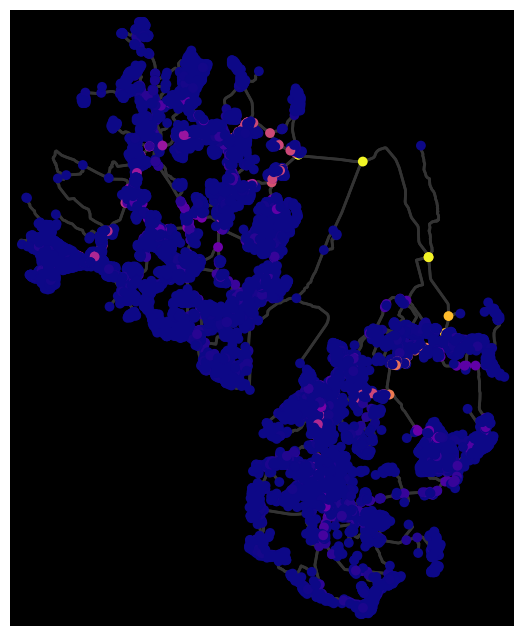

In [ ]:
import networkx as nx
import osmnx as ox

ox.settings.use_cache = True
ox.settings.log_console = True

# Place
place = "Vsevolozhsky District, Leningrad Oblast, Russia"


print(f"Loading graph for: {place}...")
G = ox.graph_from_place(place, network_type="drive")


print("Graph loaded successfully:")
print(G)

print(" speeds and travel times")
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)


print("Converting to DiGraph...")
D = ox.convert.to_digraph(G, weight="travel_time")


print("Calculating betweenness centrality...")
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")


print("Plotting graph...")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot.plot_graph(
    G,
    bgcolor="k",
    node_color=nc,
    node_size=50,
    edge_linewidth=2,
    edge_color="#333333",
    show=False,
    save=True,
    filepath="./vsevolozhsky_bc.png"
)


print("Saving graph...")
ox.io.save_graph_geopackage(G, filepath="./vsevolozhsky_graph.gpkg")
ox.io.save_graphml(G, filepath="./vsevolozhsky_graph.graphml")

print("Analysis complete! Check the generated files:")
print("- vsevolozhsky_bc.png (визуализация)")
print("- vsevolozhsky_graph.gpkg (Geopackage)")
print("- vsevolozhsky_graph.graphml (GraphML)")